In [1]:
import numpy as np
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df_airp=pd.read_csv('AirPassengers.csv')

In [3]:
df_airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
df_airp.isna().sum()

#Passengers    0
dtype: int64

In [4]:
# convert the month as the end date of each month
df_airp['Month']=pd.to_datetime(df_airp['Month'],format='%Y-%m')+pd.tseries.offsets.MonthEnd(1)

In [5]:
df_airp.head()

,Month,#Passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [6]:
# make the dates as the index
df_airp.set_index(['Month'],drop=True,inplace=True)

In [7]:
df_airp.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


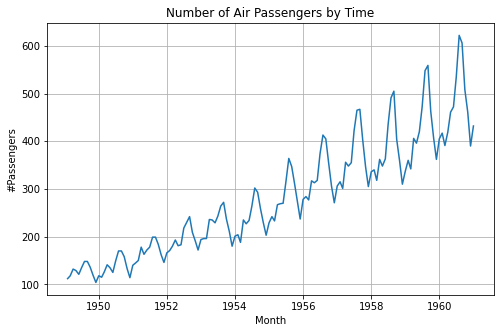

In [8]:
# plot the time series
plt.figure(figsize=(8,5))
sb.lineplot(data=df_airp,x=df_airp.index,y='#Passengers')
plt.grid(True)
plt.title('Number of Air Passengers by Time')
plt.show()

In [9]:
# Time series = Trend (up & down) + Seasonal (Repeating pattern) + Residual effect
# in the form ----> log(Trend*Seasonal*Residual) = log(Trend)+log(Seasonal)+log(Residual) 

In [10]:
# decompose the time series to get the trend, seasonal & residual report
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# extracted seasonal decomposition of the time series
decomp_airp=seasonal_decompose(df_airp['#Passengers'])

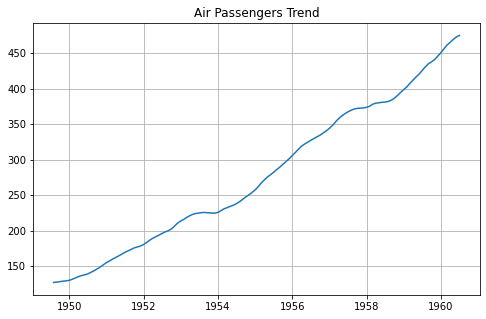

In [12]:
# visualize each component of the time series
# Trend
plt.figure(figsize=(8,5))
plt.plot(decomp_airp.trend)
plt.grid(True)
plt.title('Air Passengers Trend')
plt.show()

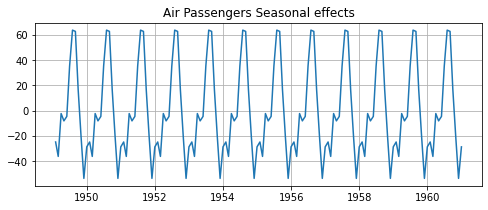

In [13]:
# visualize each component of the time series
# Seasonal
plt.figure(figsize=(8,3))
plt.plot(decomp_airp.seasonal)
plt.grid(True)
plt.title('Air Passengers Seasonal effects')
plt.show()

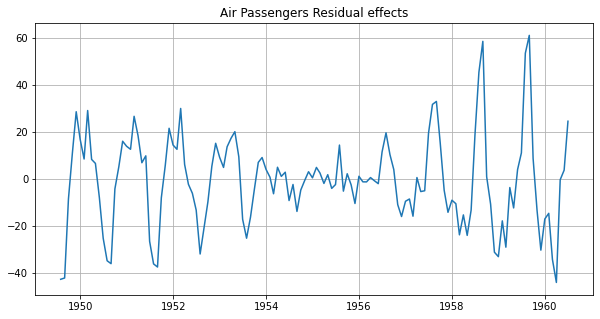

In [14]:
# visualize each component of the time series
# Residual
plt.figure(figsize=(10,5))
plt.plot(decomp_airp.resid)
plt.grid(True)
plt.title('Air Passengers Residual effects')
plt.show()

In [15]:
# Stationarity check
ts_rolling_mean=df_airp['#Passengers'].rolling(12).mean()

In [16]:
ts_rolling_mean[0:20]

Month
1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
1949-06-30           NaN
1949-07-31           NaN
1949-08-31           NaN
1949-09-30           NaN
1949-10-31           NaN
1949-11-30           NaN
1949-12-31    126.666667
1950-01-31    126.916667
1950-02-28    127.583333
1950-03-31    128.333333
1950-04-30    128.833333
1950-05-31    129.166667
1950-06-30    130.333333
1950-07-31    132.166667
1950-08-31    134.000000
Name: #Passengers, dtype: float64

In [17]:
ts_rolling_std=df_airp['#Passengers'].rolling(12).std()

In [18]:
ts_rolling_std[0:20]

Month
1949-01-31          NaN
1949-02-28          NaN
1949-03-31          NaN
1949-04-30          NaN
1949-05-31          NaN
1949-06-30          NaN
1949-07-31          NaN
1949-08-31          NaN
1949-09-30          NaN
1949-10-31          NaN
1949-11-30          NaN
1949-12-31    13.720147
1950-01-31    13.453342
1950-02-28    13.166475
1950-03-31    13.686977
1950-04-30    13.822467
1950-05-31    13.663710
1950-06-30    14.760718
1950-07-31    18.135016
1950-08-31    20.797727
Name: #Passengers, dtype: float64

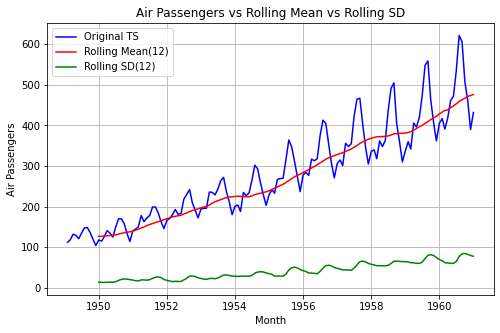

In [24]:
plt.figure(figsize=(8,5))
plt.plot(df_airp['#Passengers'],color='blue',label='Original TS')
plt.plot(ts_rolling_mean,color='red',label='Rolling Mean(12)')
plt.plot(ts_rolling_std,color='green',label='Rolling SD(12)')
plt.xlabel('Month')
plt.ylabel('Air Passengers')
plt.title('Air Passengers vs Rolling Mean vs Rolling SD')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [25]:
# Dicky fuller hypothesis test
# H0: Time series is not stationary
# H1: Time series is stationary

from statsmodels.tsa.stattools import adfuller

In [26]:
adf_test=adfuller(df_airp['#Passengers'])

In [27]:
adf_test

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [46]:
# p-value
adf_test[1]

0.9918802434376409

In [29]:
# Failed to reject null hyp

In [41]:
# first order difference to make stationary
ts_diff1=df_airp['#Passengers'].diff()

In [42]:
ts_diff1

Month
1949-01-31     NaN
1949-02-28     6.0
1949-03-31    14.0
1949-04-30    -3.0
1949-05-31    -8.0
              ... 
1960-08-31   -16.0
1960-09-30   -98.0
1960-10-31   -47.0
1960-11-30   -71.0
1960-12-31    42.0
Name: #Passengers, Length: 144, dtype: float64

In [36]:
adf_test1=adfuller(ts_diff1.dropna())

In [40]:
adf_test1

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [43]:
# second order difference to make stationary
ts_diff2=df_airp['#Passengers'].diff().diff()
ts_diff2

Month
1949-01-31      NaN
1949-02-28      NaN
1949-03-31      8.0
1949-04-30    -17.0
1949-05-31     -5.0
              ...  
1960-08-31   -103.0
1960-09-30    -82.0
1960-10-31     51.0
1960-11-30    -24.0
1960-12-31    113.0
Name: #Passengers, Length: 144, dtype: float64

In [44]:
adf_test2=adfuller(ts_diff2.dropna())
adf_test2

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275606)

In [38]:
np.round(adf_test2[1],2)

0.0

In [47]:
# we can see the p value is <=0.05 . Hence H0 is rejected. So the time series is stationary.

In [48]:
# Auto Correlation Function & Partial Correlation Function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

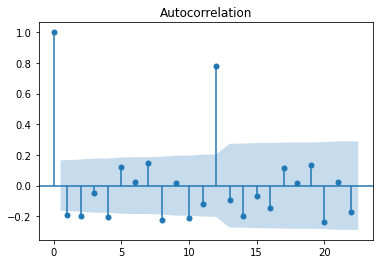

In [50]:
plot_acf(ts_diff2.dropna())
plt.show()

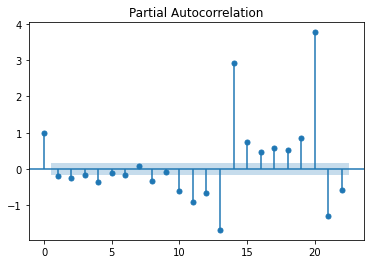

In [51]:
plot_pacf(ts_diff2.dropna())
plt.show()

In [52]:
df_airp.tail()

,#Passengers
Month,
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390
1960-12-31,432


In [53]:
df_train=df_airp[df_airp.index<pd.to_datetime('1960-01-31')]
df_test=df_airp[df_airp.index>=pd.to_datetime('1960-01-31')]

In [54]:
df_train.tail()

,#Passengers
Month,
1959-08-31,559
1959-09-30,463
1959-10-31,407
1959-11-30,362
1959-12-31,405


In [57]:
df_test.head()

,#Passengers
Month,
1960-01-31,417
1960-02-29,391
1960-03-31,419
1960-04-30,461
1960-05-31,472


In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
model=ARIMA(df_airp['#Passengers'],order=[1,2,3],freq='M')

In [60]:
result=model.fit()

In [62]:
# forcating 12 monthly time series analysis of a univariate data
predict=result.forecast(12)[0]

In [64]:
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
# Error=np.abs(actual-forecast)
# % Error= Error/Actual
# MAPE = avg across all observations
MAPE=mean_absolute_percentage_error(df_test['#Passengers'],predict)
MAPE

0.1295081724218289

In [68]:
accuracy=1-MAPE

In [69]:
accuracy

0.8704918275781711